<a href="https://colab.research.google.com/github/sarjakpatel/SJSU/blob/main/CMPE%20258/Assignment%201/CMPE_258_Assignment_1_Part_1_Black_Box_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 258 Assignment 1

## Installing the Libraries

In [1]:
pip install torch==1.10.0+cpu torchvision==0.11.1+cpu torchaudio==0.10.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html


In [2]:
!pip install fastai

In [3]:
!pip install fastai==2.0.15

  Using cached fastai-2.0.15-py3-none-any.whl (185 kB)
  Attempting uninstall: fastai
    Found existing installation: fastai 2.5.3
    Uninstalling fastai-2.5.3:
      Successfully uninstalled fastai-2.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastbook 0.0.18 requires fastai>=2.5, but you have fastai 2.0.15 which is incompatible.


In [4]:
!pip install fastbook --upgrade

  Using cached fastai-2.5.3-py3-none-any.whl (189 kB)
  Attempting uninstall: fastai
    Found existing installation: fastai 2.0.15
    Uninstalling fastai-2.0.15:
      Successfully uninstalled fastai-2.0.15


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## cnn_learner for image classification

In [6]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
# learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.134074,0.021721,0.008119,33:42


In [ ]:
# is_cat,_,probs = learn.predict(img)
# print(f"Is this a cat?: {is_cat}.")
# print(f"Probability it's a cat: {probs[1].item():.6f}")

NameError: ignored

## unet_learner for segmentation

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [ ]:
learn_image_segmation = unet_learner(dls, resnet34)
learn_image_segmation.fit_one_cycle(1, 3e-3, wd=1e-2)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,7.851111,2.686797,01:12


## text_classifier_learner for sentiment analysis

In [13]:
from fastai.text.all import *
import pandas as pd

In [14]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Corona NLP Data/Corona_NLP_train.csv", usecols = ['OriginalTweet', 'Sentiment'], encoding = 'latin1')
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [15]:
dls_lm = TextDataLoaders.from_df(df, 
                                 text_col = 'OriginalTweet', 
                                 label_col = 'Sentiment', 
                                 valid_pct = 0.20, 
                                 bs = 64, 
                                 is_lm = True)

In [16]:
dls_lm.show_batch(max_n = 1)

,text,text_
0,"xxbos xxmaj in light of xxup covid-19 , all my commissions will now be 20 % off . \r\r\n ( i have nt edited the prices in here so please do the math xxunk ) https : / / t.co / xxunk xxbos # xxup covid2019 : @eu_commission & & xxmaj european consumer authorities sharing information and working together to tackle spread of fake products online . \r\r\n\r\r\n xxmaj for more on","xxmaj in light of xxup covid-19 , all my commissions will now be 20 % off . \r\r\n ( i have nt edited the prices in here so please do the math xxunk ) https : / / t.co / xxunk xxbos # xxup covid2019 : @eu_commission & & xxmaj european consumer authorities sharing information and working together to tackle spread of fake products online . \r\r\n\r\r\n xxmaj for more on this"


In [17]:
learn_text_language = language_model_learner(dls_lm, AWD_LSTM, drop_mult = 0.3)

In [ ]:
learn_text_language.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,time


In [ ]:
learn_text_language.save_encoder('finetuned')

In [ ]:
dls_clas = TextDataLoaders.from_df(df, 
                        valid_pct = 0.2, 
                        text_col = 'OriginalTweet',
                        label_col = 'Sentiment', 
                        bs = 64, 
                        text_vocab = dls_lm.vocab)

In [ ]:
learn_text = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult = 0.5, metrics = accuracy).to_fp16()# load our saved encoder
learn_text = learn_text.load_encoder('finetuned')

In [ ]:
learn_text.lr_find()

In [ ]:
learn_text.fit_one_cycle(1, 2e-3)

In [ ]:
learn_text.predict('This was a really bad day in my life. My whole family except my dad was infected.')

## tabular_learner for decisiontree

In [6]:
pip install fastai==1.0.58

  Using cached fastai-1.0.58-py3-none-any.whl (236 kB)
  Attempting uninstall: fastai
    Found existing installation: fastai 2.5.3
    Uninstalling fastai-2.5.3:
      Successfully uninstalled fastai-2.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastbook 0.0.18 requires fastai>=2.5, but you have fastai 1.0.58 which is incompatible.


In [7]:
import pandas as pd
from fastai import *
from fastai.tabular import *
from fastai.tabular.data import *

In [8]:
# load Data
train = pd.read_csv("/content/drive/MyDrive/Dataset/HousePricePrediction/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Dataset/HousePricePrediction/test.csv")

In [9]:
test_id = test['Id']
test.fillna(value = test.mean(), inplace = True)

train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
dep_var = 'SalePrice'
# cat_names = train.select_dtypes(include=['object']).columns.tolist()
cat_names = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
             'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
             'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
             'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
             'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
             'MSSubClass', 'OverallQual', 'OverallCond','BsmtFullBath',
              'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces','GarageCars','YrSold' , 'MoSold', 'LowQualFinSF' , 'PoolArea', 
             'YearBuilt', 'YearRemodAdd' , 'MiscVal', '3SsnPorch']


In [11]:
# cont_names = train.select_dtypes(include=[np.number]).columns.tolist()
cont_names = [  'LotFrontage', 'LotArea',  
               'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
              'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']

In [12]:
print("Categorical columns are : ", cat_names)
print('Continuous numerical columns are :', cont_names)

Categorical columns are :  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'YrSold', 'MoSold', 'LowQualFinSF', 'PoolArea', 'YearBuilt', 'YearRemodAdd', 'MiscVal', '3SsnPorch']
Continuous numerical columns are : ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',

In [13]:
procs = [FillMissing, Categorify, Normalize]

In [14]:
# Test tabularlist
test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [15]:
# Train data bunch
data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_rand_pct(valid_pct = 0.1, seed = 42)
                        .label_from_df(cols = dep_var, label_cls = FloatList, log = True )
                        .add_test(test)
                        .databunch())

In [16]:
data.show_batch(rows = 10)

MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,YrSold,MoSold,LowQualFinSF,PoolArea,YearBuilt,YearRemodAdd,MiscVal,3SsnPorch,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,target
RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,WdShing,Plywood,None,TA,TA,CBlock,#na#,#na#,#na#,#na#,#na#,GasA,TA,Y,SBrkr,TA,Min2,Gd,Detchd,Fin,TA,TA,N,#na#,#na#,#na#,WD,Normal,50,4,4,0,0,2,0,4,1,7,1,2,2008,7,0,0,1959,1959,0,0,False,False,False,0.4684,0.6237,-0.5837,-0.9791,-0.2792,-1.2788,-2.4264,-0.1137,0.2686,0.1312,0.5141,0.9878,-0.7483,0.1647,-0.3578,-0.2710,11.808814
RL,Pave,#na#,Reg,Bnk,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,Gd,Gd,No,Rec,Unf,GasA,TA,Y,SBrkr,Gd,Maj1,TA,Detchd,Unf,TA,TA,Y,#na#,#na#,#na#,WD,Normal,70,8,8,0,0,2,1,3,1,10,2,2,2007,12,0,0,1932,1994,0,0,False,False,False,0.0158,-0.0047,-0.5837,-0.3269,-0.2792,-0.0257,-0.4676,1.0025,1.8957,2.3265,-1.9425,-0.1542,-0.7483,0.3869,-0.3578,-0.2710,12.660328
RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,AsbShng,AsbShng,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,N,FuseA,TA,Typ,#na#,#na#,#na#,#na#,#na#,Y,#na#,#na#,#na#,WD,Abnorml,50,4,4,0,0,1,1,4,1,6,0,0,2006,12,0,0,1949,1950,0,0,False,False,True,-0.4368,0.0174,-0.5837,-0.9791,-0.2792,0.3439,-0.7730,-1.1544,0.2778,-0.6321,0.0561,-2.2478,-0.7483,-0.7094,-0.3578,-0.2710,11.81303
RL,Pave,#na#,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,2Story,Hip,CompShg,HdBoard,HdBoard,BrkCmn,TA,TA,CBlock,TA,TA,Mn,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,#na#,GdPrv,#na#,WD,Abnorml,60,6,5,0,0,2,1,3,1,6,1,2,2010,4,0,0,1978,1978,0,0,True,False,False,-0.0294,0.0957,1.2721,-0.0173,-0.2792,-0.7514,-0.8833,-1.2793,0.8324,-0.2582,-0.0272,-0.1542,1.8939,-0.7094,-0.3578,-0.2710,11.97603
RL,Pave,#na#,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,None,TA,Fa,CBlock,TA,TA,No,Rec,Unf,GasA,Fa,Y,SBrkr,TA,Typ,#na#,Detchd,Unf,TA,TA,Y,#na#,MnPrv,#na#,WD,Normal,50,5,4,0,0,2,0,4,1,6,0,2,2010,6,0,0,1952,1952,0,0,False,False,False,0.0611,-0.2014,-0.5837,0.1342,-0.2792,-0.3706,-0.3367,-0.6601,0.2847,-0.2601,0.8889,1.1782,-0.7483,-0.7094,-0.3578,-0.2710,12.019743
RL,Pave,#na#,IR1,Lvl,AllPub,CulDSac,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,#na#,GdWo,#na#,WD,Normal,60,6,5,0,0,2,1,4,1,8,1,2,2006,6,0,0,1971,1971,0,0,True,False,False,-0.0294,0.4014,0.8421,-0.0656,-0.2792,-0.3570,-0.5319,-0.1735,1.2495,0.9118,-0.3186,0.1076,-0.7483,0.2684,-0.3578,-0.2710,12.154779
RL,Pave,#na#,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,#na#,GdPrv,#na#,WD,Normal,60,8,5,0,0,2,1,3,1,7,2,3,2008,12,0,0,1999,2000,0,0,False,False,False,0.1516,-0.1490,1.2268,0.4878,-0.2792,-0.5216,-0.1209,-0.4155,1.1395,0.6400,0.8472,0.8927,1.0184,0.8610,-0.3578,-0.2710,12.345835
RL,Pave,#na#,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,No,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,#na#,Attchd,Unf,TA,TA,Y,#na#,#na#,#na#,WD,Normal,20,6,8,1,0,1,1,3,1,6,0,2,2008,7,0,0,1969,1969,0,0,Fal

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,49.483376,10.866239,3.289764,00:01


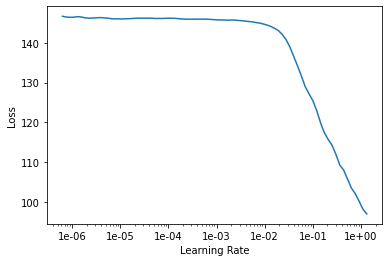

In [17]:
# Create deep learning model
learn_tabular = tabular_learner(data, layers=[200,100], metrics=rmse)

# select the appropriate learning rate
learn_tabular.lr_find()

# we typically find the point where the slope is steepest
learn_tabular.recorder.plot()

# Fit the model based on selected learning rate
learn_tabular.fit_one_cycle(1, max_lr =1e-01)

In [18]:
# get predictions
preds, targets = learn_tabular.get_preds(DatasetType.Test)
labels = [np.exp(p[0].data.item()) for p in preds]


##  collab_learner for ranking

In [19]:
pip install fastai==1.0.58

In [20]:
from fastai.collab import *
from fastai.tabular import *
from fastai.basics import *
from fastai.collab import CollabDataBunch, collab_learner

In [21]:
ratings = pd.read_csv('/content/drive/MyDrive/Dataset/Song Dataset/songsDataset.csv')
ratings.head()

,'userID','songID','rating'
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5


In [22]:
ratings.columns = ['userID', 'songID', 'rating']

In [23]:
ratings['rating'].value_counts()

5    780134
1    399243
4    344972
3    287831
2    187820
Name: rating, dtype: int64

In [24]:
data = CollabDataBunch.from_df(ratings, seed=42, valid_pct=0.2)

In [25]:
data.show_batch()

userID,songID,target
50577,40894,1.0
24492,117710,1.0
81228,131376,5.0
92508,112004,5.0
82043,27465,1.0


In [26]:
y_range = [0.5,5.5]

In [27]:
learn_collab = collab_learner(data, n_factors=50, y_range=y_range, wd=1e-1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


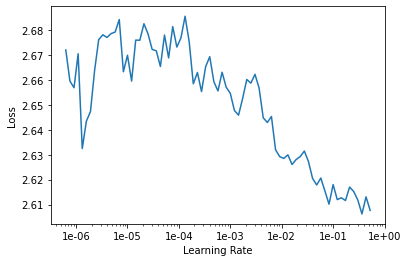

In [28]:
learn_collab.lr_find()
learn_collab.recorder.plot(skip_end=15)

In [29]:
learn_collab.fit_one_cycle(1, 1e-01)

epoch,train_loss,valid_loss,time


KeyboardInterrupt: ignored